# 📊 Exploratory Data Analysis (EDA)

This notebook performs detailed exploratory data analysis of two datasets:

- **NER Dataset**: Text-based dataset for Named Entity Recognition tasks.
- **Image Classification Dataset**: Images classified into several categories (animals10 dataset).

We will examine the data characteristics to ensure high-quality model training.

NER DATASET

## **NER Dataset Analysis**  
**Dataset Summary:**  
- The dataset contains labeled sentences where animal names are annotated as entities.  
- It consists of **10 000 samples** with 96 different animals mentioned (randomly).
- Also I found dublicates in our samples and ideally I had to remove them, but to save time I decided to use 30% of dataset because my dataset was too big for my needs and my model passed all tests greatly.

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from glob import glob
from collections import Counter
from wordcloud import WordCloud
import cv2
import hashlib

sns.set_style('whitegrid')

# Paths
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
ner_dataset_path = os.path.join(project_root, "dataset", "ner_data.json")
image_dataset_path = os.path.join(project_root, "dataset", "animals10", "raw-img")

Loaded 10000 records from the NER dataset.


C:\Users\marko\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


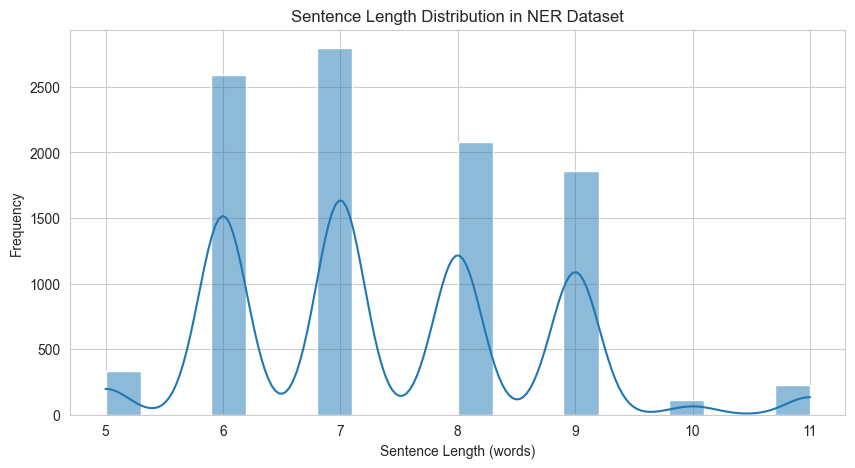

In [2]:
# Load NER data
with open(ner_dataset_path, "r", encoding="utf-8") as f:
    ner_data = json.load(f)

print(f"Loaded {len(ner_data)} records from the NER dataset.")

# Define texts and entities from loaded data
texts = [item["sentence"] for item in ner_data]
entities = [[(ent["start"], ent["end"], ent["label"]) for ent in item["entities"]] for item in ner_data]

# Preview examples
ner_data[:3]

# Sentence length analysis
sentence_lengths = [len(item["sentence"].split()) for item in ner_data]
plt.figure(figsize=(10, 5))
sns.histplot(sentence_lengths, bins=20, kde=True)
plt.title("Sentence Length Distribution in NER Dataset")
plt.xlabel("Sentence Length (words)")
plt.ylabel("Frequency")
plt.show()

In [3]:
# Convert NER JSON dataset to DataFrame
ner_df = pd.DataFrame(ner_data)

# Expand entities column to extract useful information
ner_df["entity_count"] = ner_df["entities"].apply(len)

# Display first 5 rows
ner_df.head()

,sentence,entities,entity_count
0,A antelope is definitely present in this picture.,"[{'text': 'antelope', 'start': 2, 'end': 10, '...",1
1,A mole is definitely present in this picture.,"[{'text': 'mole', 'start': 2, 'end': 6, 'label...",1
2,There seems to be a donkey over there.,"[{'text': 'donkey', 'start': 20, 'end': 26, 'l...",1
3,A cat is definitely present in this picture.,"[{'text': 'cat', 'start': 2, 'end': 5, 'label'...",1
4,The picture likely features a peacock.,"[{'text': 'peacock', 'start': 30, 'end': 37, '...",1


Total unique animals in dataset: 96
Animal list: ['ostrich', 'cockatoo', 'gecko', 'eel', 'tortoise', 'dolphin', 'donkey', 'wombat', 'stingray', 'giraffe', 'fox', 'chameleon', 'cat', 'crocodile', 'barracuda', 'boar', 'penguin', 'moose', 'chicken', 'owl', 'tiger', 'mongoose', 'hippopotamus', 'iguana', 'butterfly', 'jaguar', 'shrimp', 'quokka', 'flamingo', 'viper', 'tapir', 'yak', 'marmot', 'albatross', 'lynx', 'ferret', 'newt', 'gopher', 'weasel', 'turkey', 'meerkat', 'seal', 'panda', 'porcupine', 'octopus', 'krill', 'lion', 'emu', 'squirrel', 'zebra', 'sheep', 'parrot', 'peacock', 'bear', 'starfish', 'shark', 'wolf', 'elephant', 'hedgehog', 'tarsier', 'raccoon', 'mantis', 'antelope', 'lobster', 'monkey', 'deer', 'mole', 'salmon', 'armadillo', 'snail', 'puffin', 'sloth', 'oyster', 'goat', 'vulture', 'rabbit', 'cow', 'walrus', 'whale', 'hyena', 'dingo', 'clownfish', 'falcon', 'spider', 'dog', 'cobra', 'beaver', 'gazelle', 'crab', 'scorpion', 'bison', 'kangaroo', 'narwhal', 'puma', 'platyp

C:\Users\marko\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


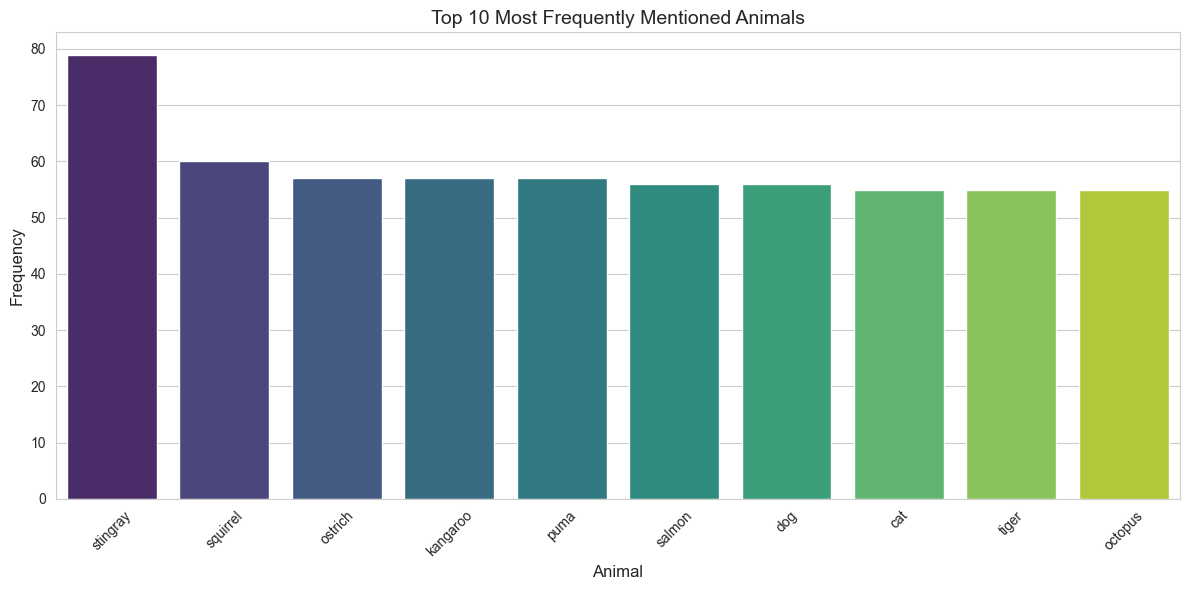

In [4]:
# Extract unique animal names from dataset entities
animal_list = list(set(
    item["sentence"][ent["start"]:ent["end"]].lower()
    for item in ner_data
    for ent in item["entities"]
    if ent["label"] == "ANIMAL"
))

print(f"Total unique animals in dataset: {len(animal_list)}")
print("Animal list:", animal_list)

# Count animal mentions in texts
words = [word.lower() for item in ner_data for word in item["sentence"].split()]
animal_counts = Counter(words)

animal_frequency = {animal: animal_counts[animal] for animal in animal_list}

# Get top 10 animals by frequency
top_animals = dict(Counter(animal_frequency).most_common(10))

# Visualization of top 10 animals
plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_animals.keys()), y=list(top_animals.values()), palette="viridis")

plt.title("Top 10 Most Frequently Mentioned Animals", fontsize=14)
plt.xlabel("Animal", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

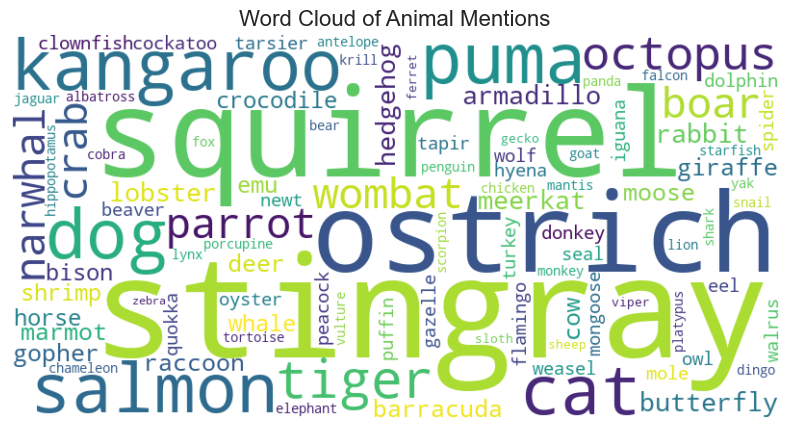

In [5]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(animal_frequency)

# Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud of Animal Mentions", fontsize=16)
plt.show()

C:\Users\marko\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


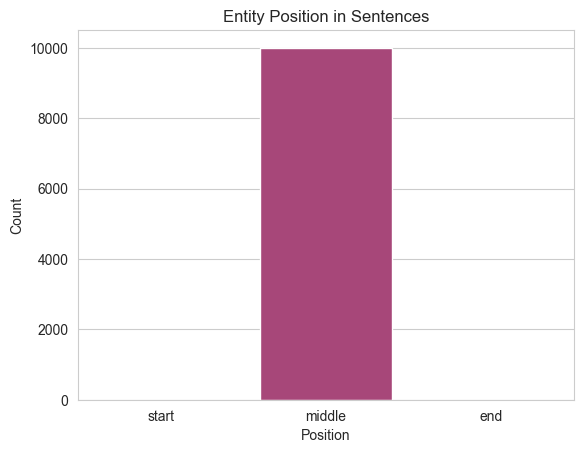

In [6]:
positions = {"start": 0, "middle": 0, "end": 0}

for sentence, entity in zip(texts, entities):
    animal_positions = [sentence[start:end] for start, end, label in entity if label == "ANIMAL"]
    words = sentence.split()
    for animal in animal_positions:
        animal_word = animal.split()[0]  # беремо перше слово сутності
        if words[0].startswith(animal_word):
            positions["start"] += 1
        elif words[-1].endswith(animal_word):
            positions["end"] += 1
        else:
            positions["middle"] += 1

# Visualization
sns.barplot(x=list(positions.keys()), y=list(positions.values()), palette="magma")
plt.title("Entity Position in Sentences")
plt.xlabel("Position")
plt.ylabel("Count")
plt.show()

C:\Users\marko\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


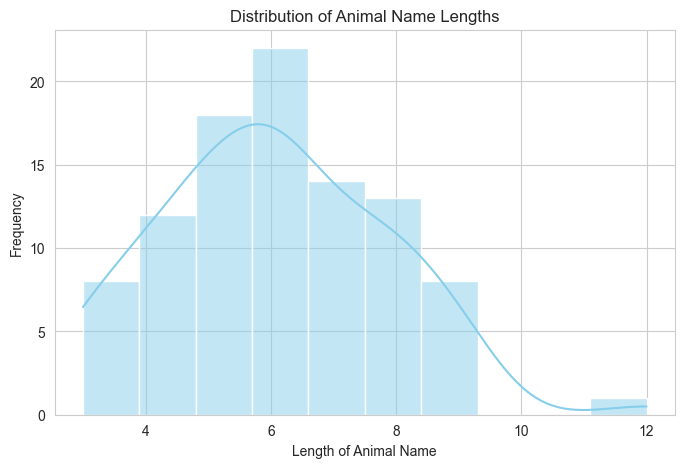

In [7]:
animal_name_lengths = [len(animal) for animal in animal_list]

plt.figure(figsize=(8, 5))
sns.histplot(animal_name_lengths, bins=10, kde=True, color="skyblue")
plt.title("Distribution of Animal Name Lengths")
plt.xlabel("Length of Animal Name")
plt.ylabel("Frequency")
plt.show()

C:\Users\marko\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


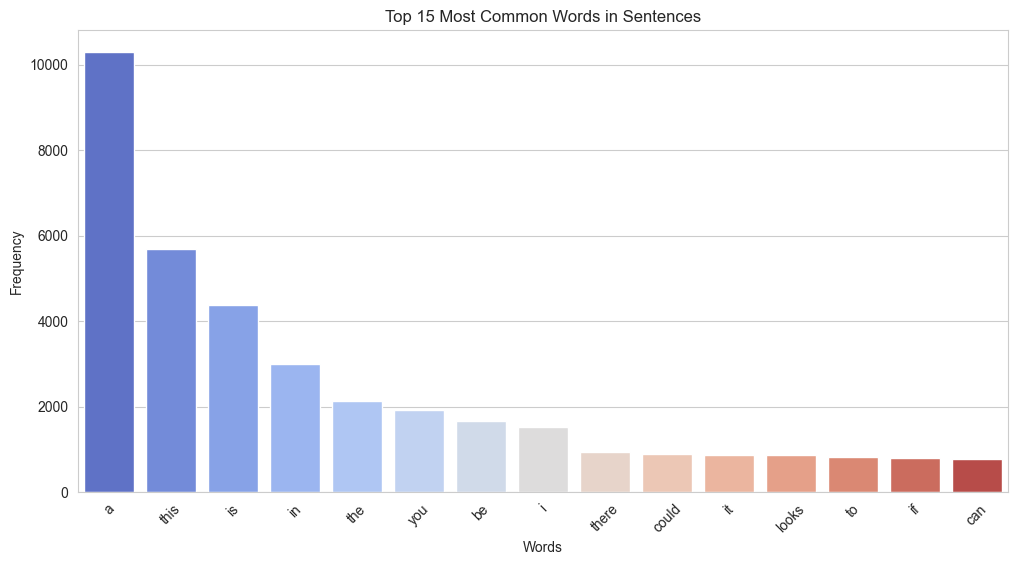

In [8]:
all_words = [word.lower() for item in ner_data for word in item["sentence"].split()]
common_words = Counter(all_words).most_common(15)

words, frequencies = zip(*common_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(frequencies), palette="coolwarm")
plt.title("Top 15 Most Common Words in Sentences")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

C:\Users\marko\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


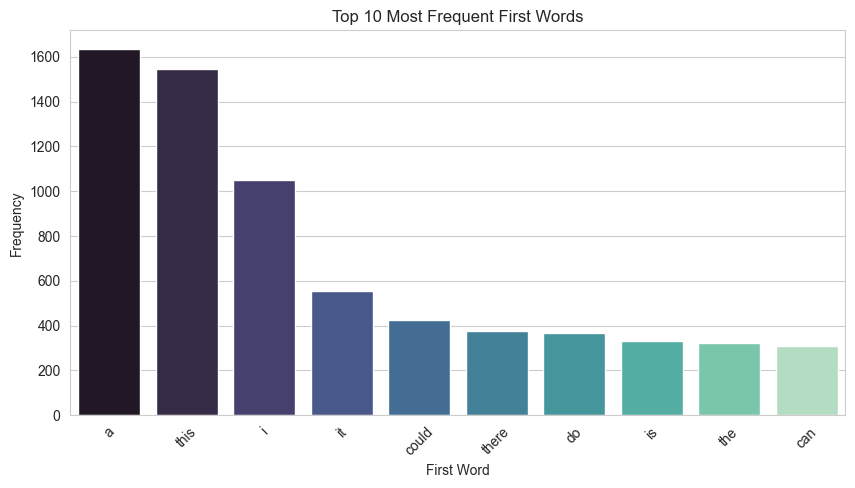

In [9]:
first_words = [sentence["sentence"].split()[0].lower() for sentence in ner_data]
first_words_counts = Counter(first_words).most_common(10)

words, frequencies = zip(*first_words_counts)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(frequencies), palette="mako")
plt.title("Top 10 Most Frequent First Words")
plt.xlabel("First Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

C:\Users\marko\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


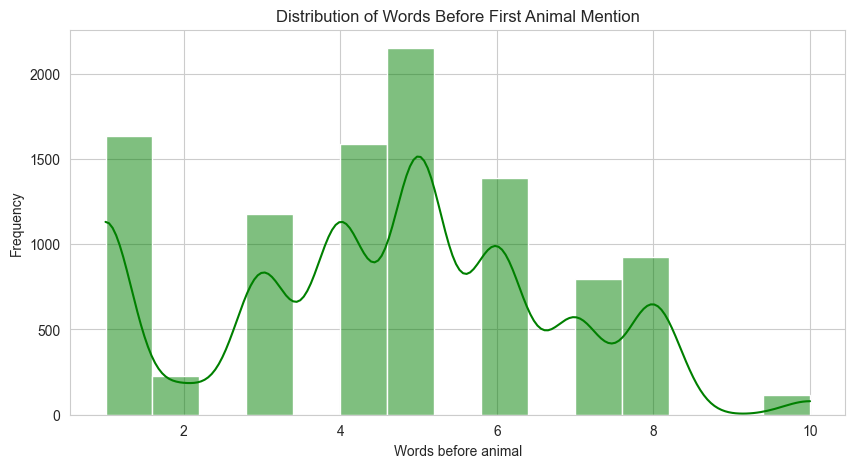

In [10]:
words_before_animal = []

for item in ner_data:
    sentence = item["sentence"].lower().split()
    entities = sorted(item["entities"], key=lambda x: x["start"])
    if entities:
        animal_start_idx = len(item["sentence"][:entities[0]["start"]].split())
        words_before_animal.append(animal_start_idx)

plt.figure(figsize=(10, 5))
sns.histplot(words_before_animal, bins=15, kde=True, color="green")
plt.title("Distribution of Words Before First Animal Mention")
plt.xlabel("Words before animal")
plt.ylabel("Frequency")
plt.show()

C:\Users\marko\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


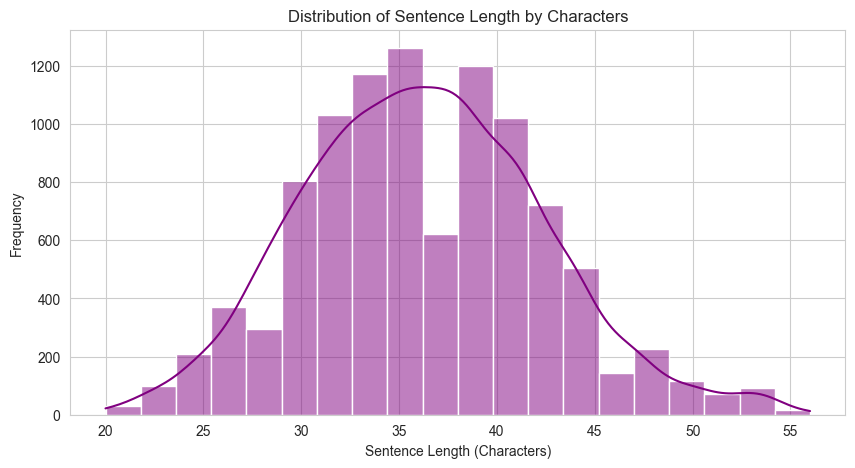

In [11]:
sentence_char_lengths = [len(item["sentence"]) for item in ner_data]

plt.figure(figsize=(10, 5))
sns.histplot(sentence_char_lengths, bins=20, kde=True, color="purple")
plt.title("Distribution of Sentence Length by Characters")
plt.xlabel("Sentence Length (Characters)")
plt.ylabel("Frequency")
plt.show()

Image Classification DATASET
## **Image Classification Dataset Analysis**  
**Dataset Summary:**  
- The dataset contains **28 000 images** distributed across **10 animal classes**.  
- Images come in different formats, including **JPG, JPEG, and PNG**.  
- The dataset has images of various sizes, but the main part is under 1000 pixels.
- Also there are two non-RGB images in grey colours.
- There are no dublicates.

Classes found: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


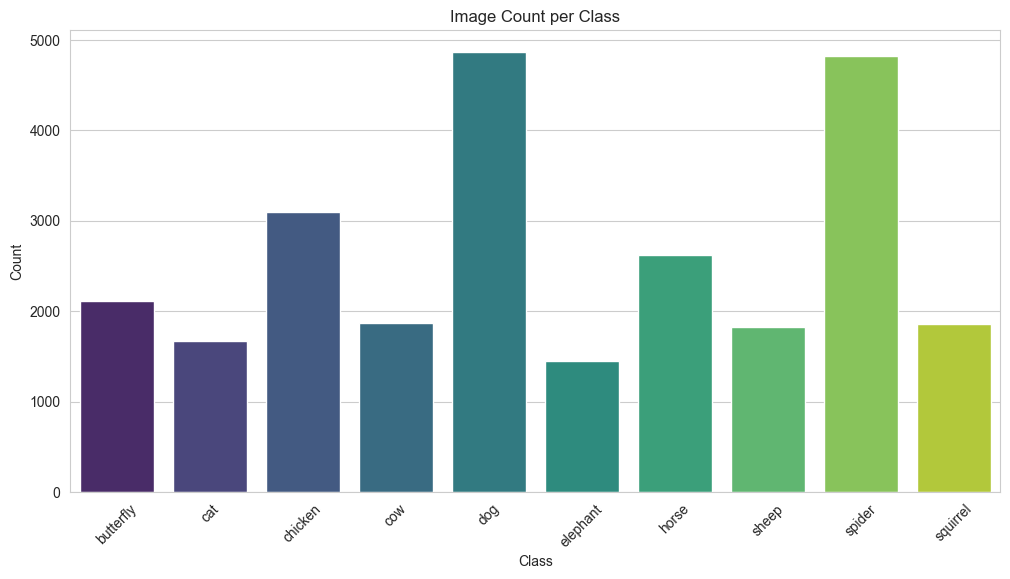

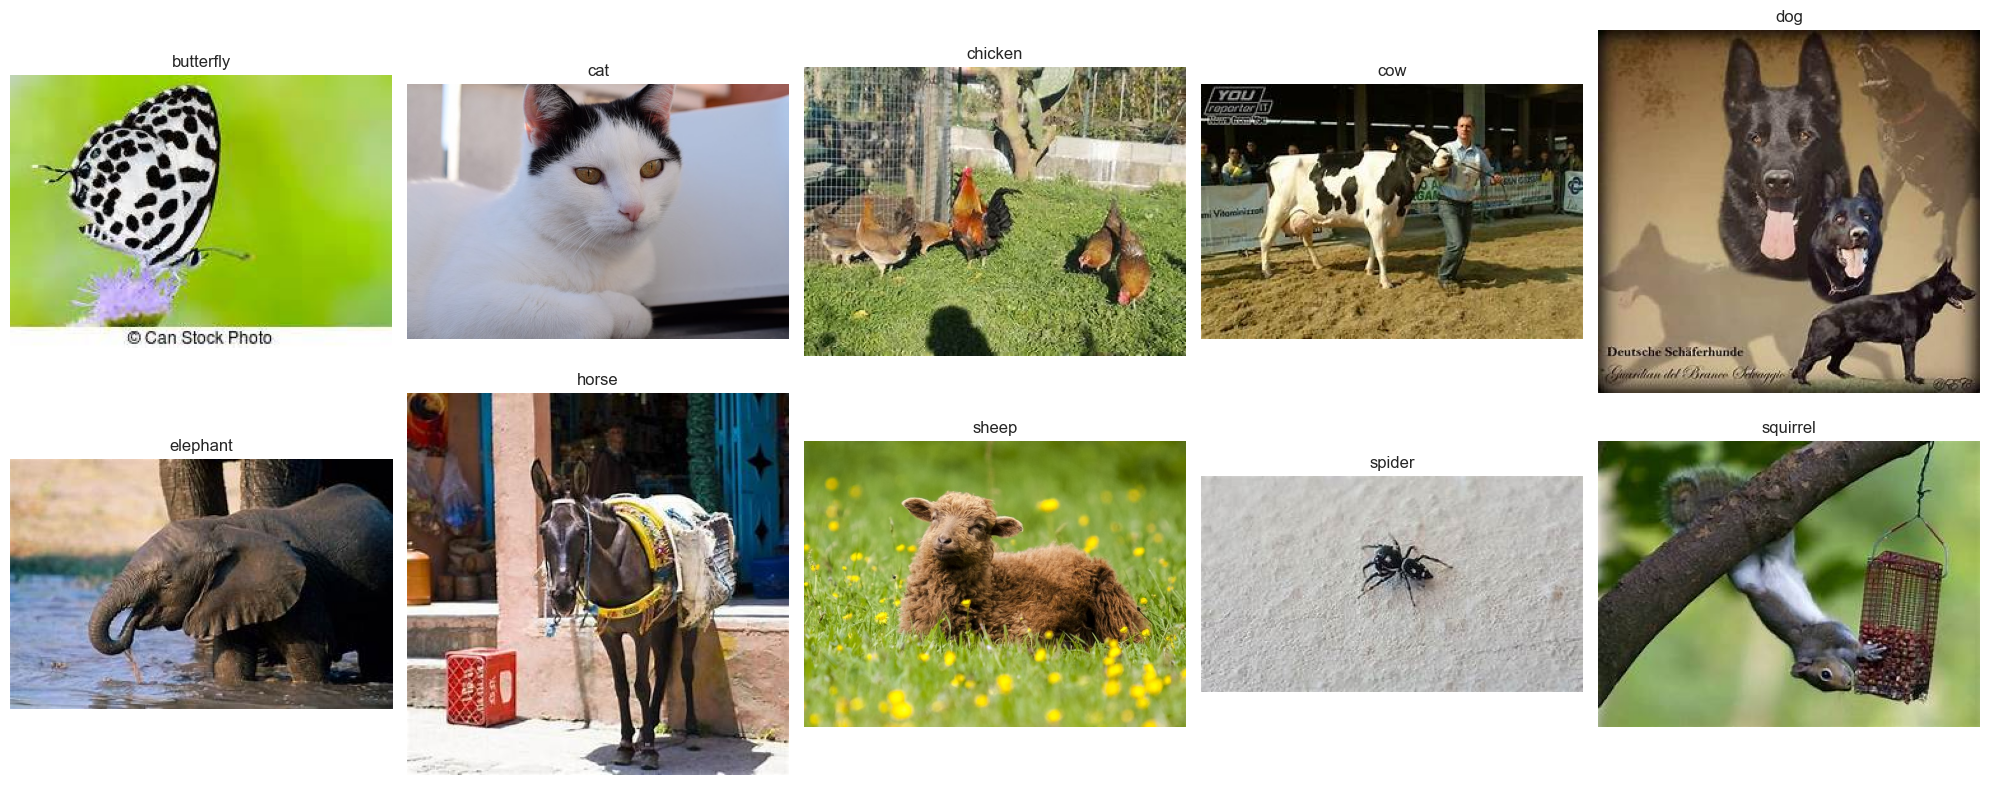

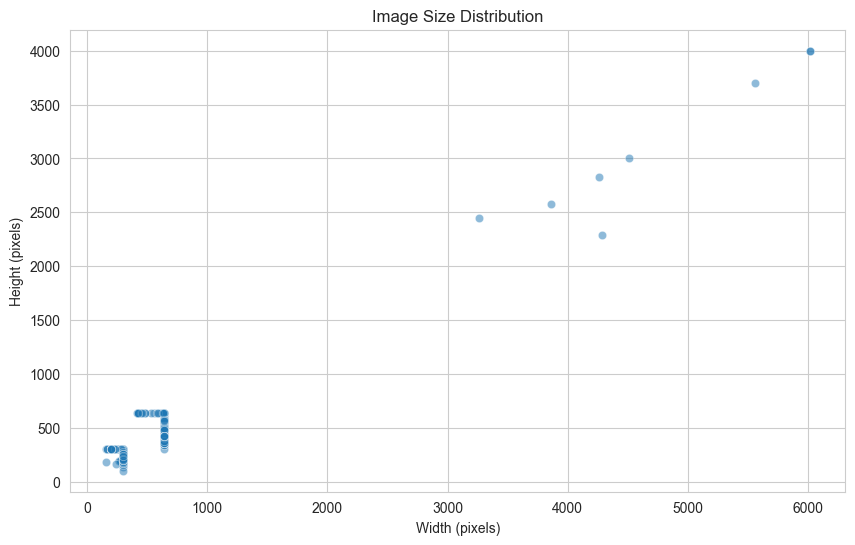

In [12]:
# Get classes
image_classes = os.listdir(image_dataset_path)
print(f"Classes found: {image_classes}")

# Supported image formats
image_formats = ['*.jpg', '*.jpeg', '*.png']

# Count images per class
image_counts = {}
for cls in image_classes:
    images = []
    for fmt in image_formats:
        images.extend(glob(os.path.join(image_dataset_path, cls, fmt)))
    image_counts[cls] = len(images)

counts_df = pd.DataFrame(image_counts.items(), columns=['Class', 'Count'])

# Plot distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=counts_df, x='Class', y='Count', palette='viridis')
plt.title("Image Count per Class")
plt.xticks(rotation=45)
plt.show()

# Visualize random images
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for ax, cls in zip(axes, image_classes):
    images = []
    for fmt in image_formats:
        images.extend(glob(os.path.join(image_dataset_path, cls, fmt)))
    if images:
        img_path = np.random.choice(images)
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(cls)
        ax.axis('off')
    else:
        ax.axis('off')
        ax.set_title(f"{cls} (No Images)")

plt.tight_layout()
plt.show()

# Image size analysis
img_sizes = []
for cls in image_classes:
    images = []
    for fmt in image_formats:
        images.extend(glob(os.path.join(image_dataset_path, cls, fmt)))
    for img_path in images[:50]:  # analyze first 50 images per class
        img = Image.open(img_path)
        img_sizes.append(img.size)

widths, heights = zip(*img_sizes)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=widths, y=heights, alpha=0.5)
plt.title("Image Size Distribution")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()


In [13]:
# Check all unique file formats in the dataset
all_formats = set()
for cls in image_classes:
    files = glob(os.path.join(image_dataset_path, cls, '*'))
    formats = {os.path.splitext(file)[-1].lower() for file in files}
    all_formats.update(formats)

print(f"All unique image formats in dataset: {all_formats}")

All unique image formats in dataset: {'.png', '.jpg', '.jpeg'}


Total grayscale images found: 2


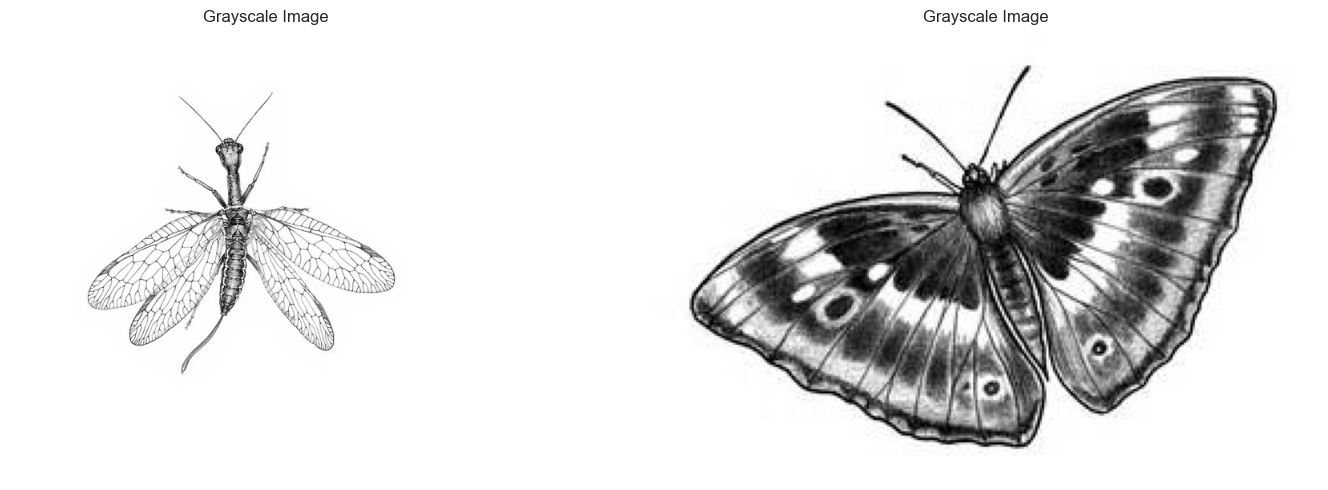

In [14]:
def check_grayscale(image_path):
    """Check if an image is grayscale by comparing RGB channels."""
    img = Image.open(image_path).convert("RGB")
    img_array = np.array(img)
    return np.all(img_array[:, :, 0] == img_array[:, :, 1])

# Collect all image paths
image_paths = []
for cls in image_classes:
    for fmt in image_formats:
        image_paths.extend(glob(os.path.join(image_dataset_path, cls, fmt)))

# Check the first 500 images for grayscale
grayscale_images = [img for img in image_paths[:500] if check_grayscale(img)]

print(f"Total grayscale images found: {len(grayscale_images)}")

# Optional: Show some grayscale images
if grayscale_images:
    fig, axes = plt.subplots(1, min(5, len(grayscale_images)), figsize=(15, 5))
    if len(grayscale_images) == 1:
        axes = [axes]  # Ensure axes is iterable for a single image case

    for ax, img_path in zip(axes, grayscale_images[:5]):
        img = Image.open(img_path)
        ax.imshow(img, cmap="gray")
        ax.set_title("Grayscale Image")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

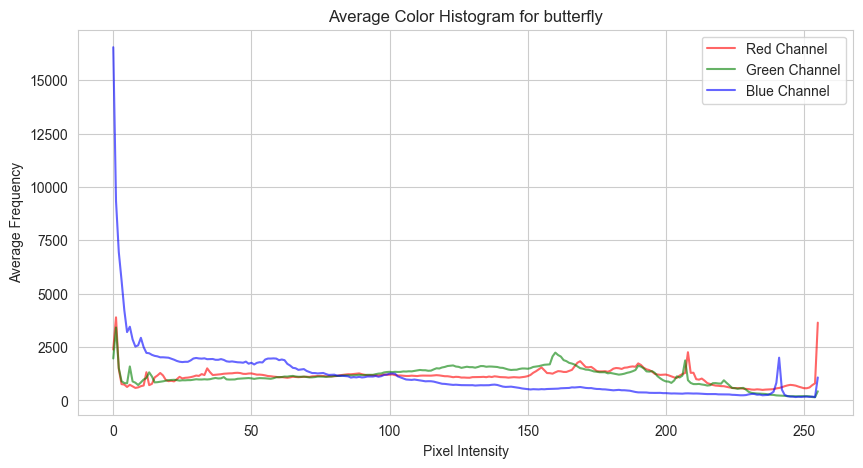

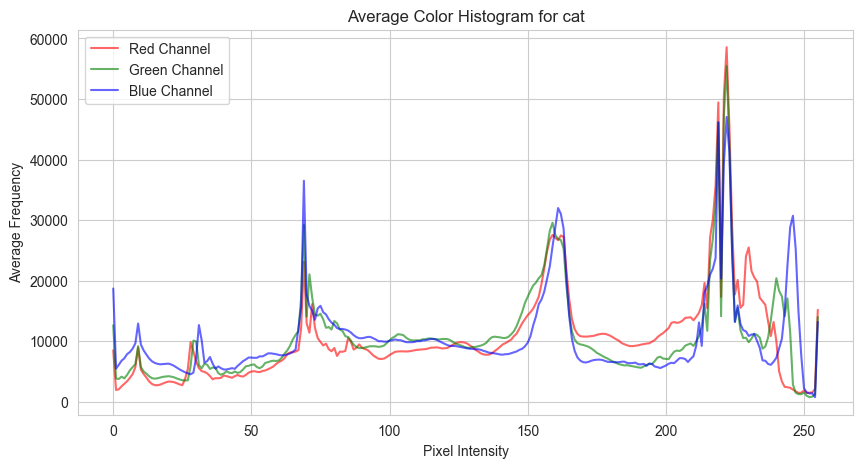

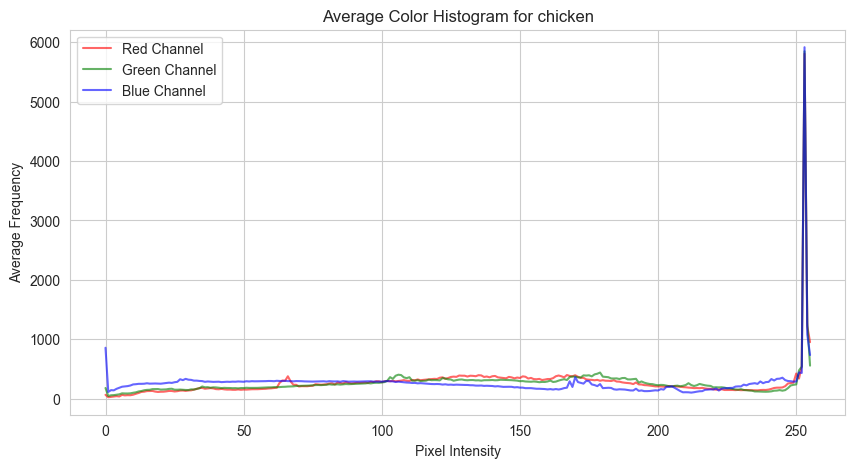

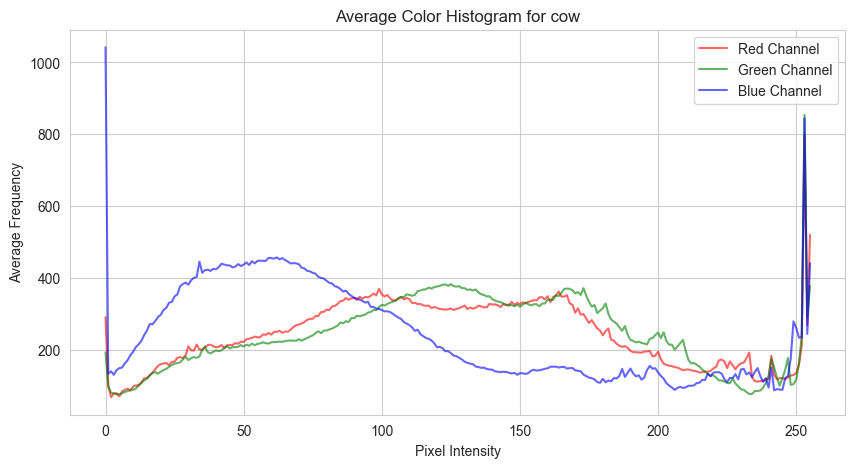

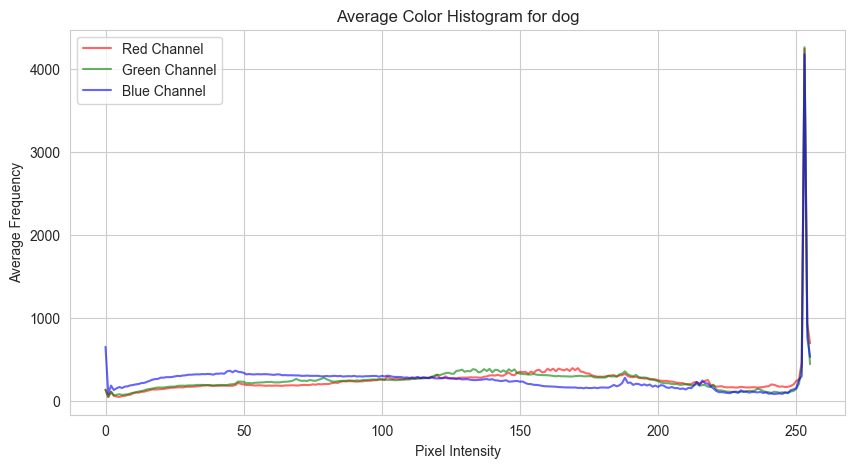

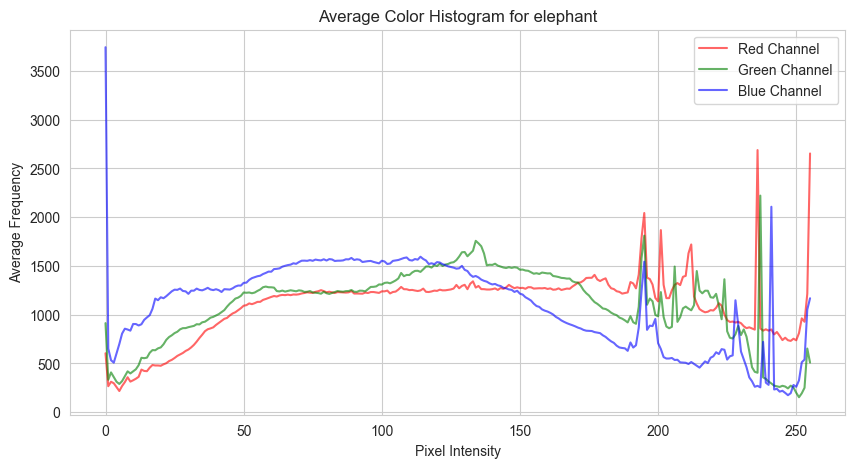

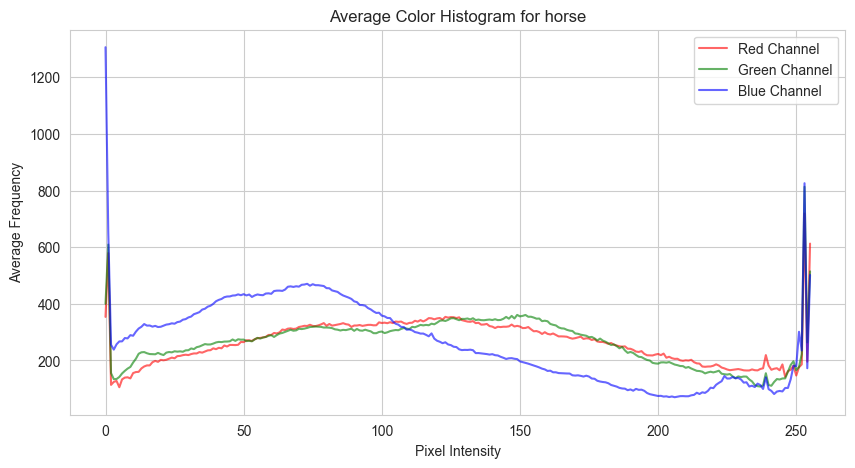

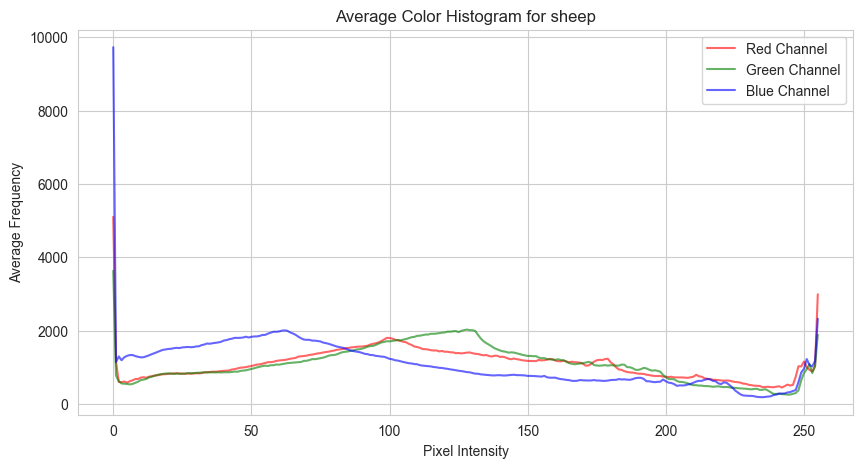

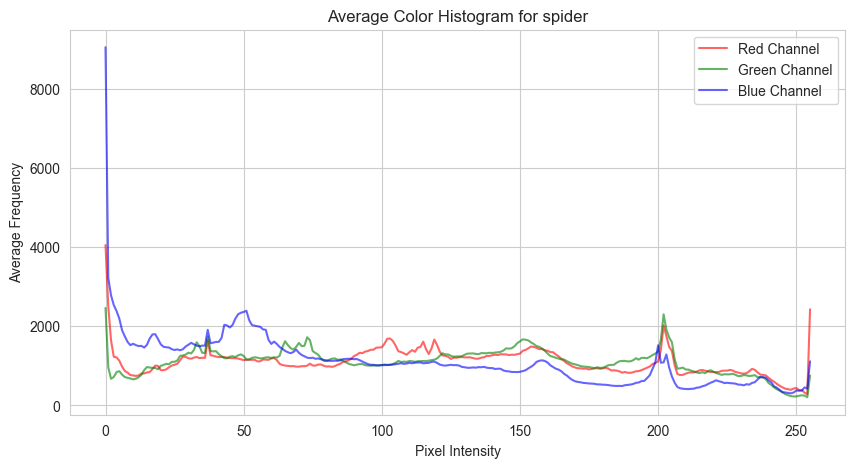

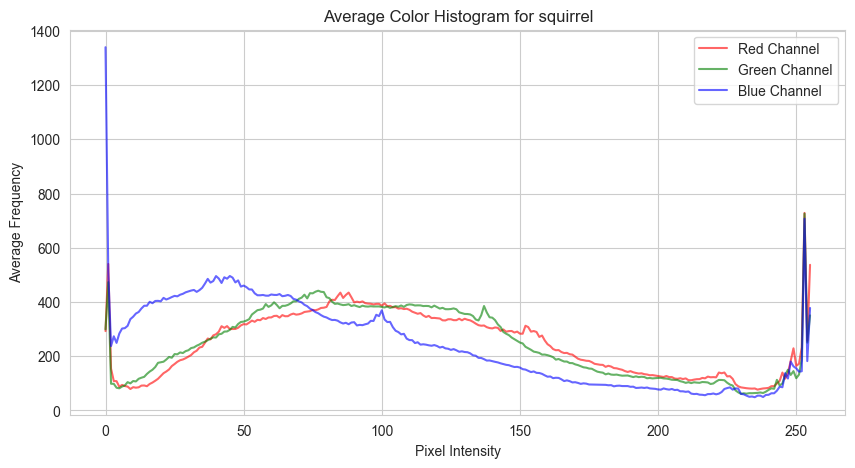

In [15]:
# Supported image formats
image_formats = ['*.jpg', '*.jpeg', '*.png']

def compute_average_histogram(image_paths):
    """Compute the average color histogram (RGB) for a given list of images."""
    hist_r = np.zeros((256,))
    hist_g = np.zeros((256,))
    hist_b = np.zeros((256,))
    num_images = len(image_paths)

    for img_path in image_paths:
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Compute histograms for each channel (Red, Green, Blue)
        for i, hist in enumerate([hist_r, hist_g, hist_b]):
            hist += cv2.calcHist([img], [i], None, [256], [0, 256]).flatten()

    # Normalize by the number of images to get the average histogram
    if num_images > 0:
        hist_r /= num_images
        hist_g /= num_images
        hist_b /= num_images

    return hist_r, hist_g, hist_b

# Generate separate histograms for each class
for cls in image_classes:
    images = []
    for fmt in image_formats:
        images.extend(glob(os.path.join(image_dataset_path, cls, fmt)))

    if len(images) == 0:
        continue  # Skip classes without images

    hist_r, hist_g, hist_b = compute_average_histogram(images[:50])  # Use the first 50 images per class

    # Plot histograms for each color channel
    plt.figure(figsize=(10, 5))
    plt.plot(hist_r, color='red', alpha=0.6, label="Red Channel")
    plt.plot(hist_g, color='green', alpha=0.6, label="Green Channel")
    plt.plot(hist_b, color='blue', alpha=0.6, label="Blue Channel")

    plt.title(f"Average Color Histogram for {cls}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Average Frequency")
    plt.legend()
    plt.show()

In [16]:
# Supported image formats
image_formats = ['*.jpg', '*.jpeg', '*.png']

# Collect all image paths
image_paths = []
for cls in image_classes:
    for fmt in image_formats:
        image_paths.extend(glob(os.path.join(image_dataset_path, cls, fmt)))

# Dictionary to store hashes and detected duplicates
hashes = {}
duplicates = []

# Compute hash for each image and check for duplicates
for img_path in image_paths:
    with open(img_path, "rb") as f:
        img_hash = hashlib.md5(f.read()).hexdigest()
    
    if img_hash in hashes:
        duplicates.append((img_path, hashes[img_hash]))  # Store duplicate pairs
    else:
        hashes[img_hash] = img_path  # Store hash with path

# Display results
print(f"Total duplicate images found: {len(duplicates)}")

# If duplicates exist, show examples
if duplicates:
    print("\nExample duplicates:")
    for dup, original in duplicates[:5]:  # Show first 5 duplicate pairs
        print(f"Duplicate: {dup} | Original: {original}")

Total duplicate images found: 0
